## 0. 데이터 준비

In [1]:
# !pip install pandas mlxtend

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules

In [3]:
# 1. 데이터 로드
df = pd.read_csv('./DataSet_v(0)_final.csv')
df_origin = df

In [4]:
df.shape

(202772, 12)

In [5]:
df_age = df[['성별', '범주형 나이', '범주형 발생일', '위해원인', '위해증상', '위해부위', '발생장소','품목대분류']]
df_age.shape

(202772, 8)

In [6]:
print(df_age['위해증상'].str.contains('해당없음').sum())
print(df_age['위해부위'].str.contains('(부위)해당없음').sum())

0
0


/var/folders/06/qxzmlc5s27n22bkjvmvzp7ww0000gn/T/ipykernel_6818/900150110.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  print(df_age['위해부위'].str.contains('(부위)해당없음').sum())


In [7]:
df_v1 = df_age[df_age['범주형 나이'] == '0-4']
df_v1['범주형 나이'].unique()

array(['0-4'], dtype=object)

In [8]:
df_v1 = df_v1[['성별', '위해원인', '위해증상', '위해부위', '발생장소', '품목대분류']]
df_v1.head(10)

,성별,위해원인,위해증상,위해부위,발생장소,품목대분류
2,여자,이물질(기타),체내 위험 이물질,(부위)귀 및 고막,주택 - 주방,식물 식품
4,여자,이물질(기타),체내 위험 이물질,(부위)귀 및 고막,주택 - 주방,식물 식품
10,여자,식품 섭취에 의한 위험 및 위해,피부염 또는 피부발진,(부위)귀 및 고막,주택 - 주방,식물 식품
12,여자,이물질(기타),체내 위험 이물질,(부위)코,주택 - 거실,식물 식품
13,여자,이물질(기타),체내 위험 이물질,(부위)코,주택 - 거실,식물 식품
18,여자,이물질(기타),체내 위험 이물질,(부위)코,주택 - 거실,식물 식품
19,남자,이물질(기타),체내 위험 이물질,(부위)코,주택 - 거실,식물 식품
22,여자,식품 섭취에 의한 위험 및 위해,피부염 또는 피부발진,(부위)전신 손상,주택 - 주방,식물 식품
23,남자,이물질(기타),체내 위험 이물질,(부위)코,주택 - 거실,식물 식품
25,여자,이물질(기타),체내 위험 이물질,(부위)코,주택 - 거실,식물 식품


## 1. 빈발항목 분석

In [9]:
# 데이터 변환: 각 사건을 리스트로 변환
transactions = df_v1.apply(lambda x: list(x.dropna()), axis=1).tolist()

# 트랜잭션 인코더를 사용하여 원-핫 인코딩
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [10]:
df_encoded.shape
df_encoded.head(10)

,(부위)귀 및 고막,(부위)기타 얼굴부위,(부위)눈 및 눈주변(눈썹 및 눈꺼풀),"(부위)다리(무릎 아래, 무릎 및 발목 제외)",(부위)다리(무릎 위),(부위)둔부,(부위)등,(부위)머리 및 뇌(뇌막),(부위)머리카락,(부위)목,...,피부접촉에 의한 위험 및 위해,해당없음,호흡기계통 장기손상 및 통증,화상-뜨거운 액체나 증기로 인한,화상-열에 의한,화상-전기에 의한,화상-화학물로 인한,화장품 및 화장용품,화재,화재 안전 및 보안 장비
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
# 항목별로 존재 개수 확인
df_encoded.sum().nlargest(10)

남자                   26705
여자                   19360
열상(찢어짐)              14651
가구 및 가구설비            14530
추락                   14139
주택 - 침실/방            13461
미끄러짐·넘어짐             12348
주택 - 거실              11456
(부위)머리 및 뇌(뇌막)       11067
건축/인테리어 자재 및 작업공구     9853
dtype: int64

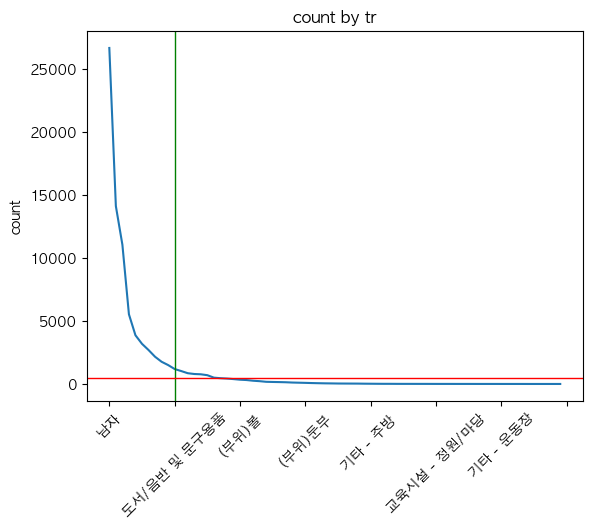

In [12]:
from matplotlib import rc 
rc('font', family='AppleGothic') 
plt.rcParams['axes.unicode_minus'] = False 

df_encoded.sum().sort_values(ascending=False)[::4].plot()
plt.title('count by tr')
plt.ylabel('count')
plt.xticks(rotation=45)

plt.axvline(x=10, color='g', linewidth=1)
plt.axhline(y=500, color='r', linewidth=1)

plt.show()

In [13]:
# 최소 및 최대 지지도 설정
min_support = 0.1
max_support = 0.9

# 빈발집합 분석 수행
frequent_itemsets = fpgrowth(df_encoded, min_support=min_support, use_colnames=True)

# 최대 지지도 필터 적용
frequent_itemsets = frequent_itemsets[frequent_itemsets['support'] <= max_support]

# 결과 출력
frequent_itemsets.sort_values(by='support', ascending=False)
# frequent_itemsets

,support,itemsets
4,0.579498,(남자)
0,0.420112,(여자)
6,0.317926,(열상(찢어짐))
11,0.315301,(가구 및 가구설비)
8,0.306816,(추락)
5,0.292103,(주택 - 침실/방 )
30,0.270425,"(가구 및 가구설비, 추락)"
10,0.267951,(미끄러짐·넘어짐)
3,0.248595,(주택 - 거실 )
7,0.240154,((부위)머리 및 뇌(뇌막))


#### 빈발집합 분석 결과

- 남자 (0.59) 대비 여자 (0.42)의 support 값이 낮음. 품목별 분석에서도 남아가 우세했던 것 생각하면 당연한 결과.

- 가구 및 가구설비, 건축/인테리어 자재 및 작업공구, 열상(찢어짐), 미끄러짐·넘어짐, 추락 등 품목별 분석에서 '0-4' 세 관련 분석이 잦게 발생했던 부분들이 존재하는 집합이 대다수 (이전 분석의 신뢰성도 얻을 수 있는 부분?).

- 대부분 비슷한 원소들이 묶여있으며 모두 품목별 분석에서 확인했던 부분들임.

## 2. 연관규칙 분석

In [14]:
# 상위 규칙 확인
min_threshold=0.5
rules_conf = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_threshold)
rules_conf.sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5,"(주택 - 침실/방 , 추락)",(가구 및 가구설비),0.147495,0.315301,0.146193,0.991173,3.143579,0.099688,77.565024,0.799868
4,"(주택 - 침실/방 , 가구 및 가구설비)",(추락),0.154482,0.306816,0.146193,0.946341,3.084392,0.098795,12.918265,0.799258
14,"(가구 및 가구설비, (부위)머리 및 뇌(뇌막))",(추락),0.159994,0.306816,0.151401,0.946291,3.084228,0.102312,12.906177,0.804482
29,"(가구 및 가구설비, 타박상)",(추락),0.109042,0.306816,0.101274,0.928756,3.027079,0.067818,9.729748,0.751605
15,"(추락, (부위)머리 및 뇌(뇌막))",(가구 및 가구설비),0.164356,0.315301,0.151401,0.921178,2.921585,0.099579,8.686621,0.787081
30,"(추락, 타박상)",(가구 및 가구설비),0.110778,0.315301,0.101274,0.914202,2.899460,0.066345,7.980343,0.736721
25,"(여자, 추락)",(가구 및 가구설비),0.138880,0.315301,0.123581,0.889844,2.822207,0.079792,6.215710,0.749799
20,(추락),(가구 및 가구설비),0.306816,0.315301,0.270425,0.881392,2.795401,0.173686,5.772787,0.926550
24,"(여자, 가구 및 가구설비)",(추락),0.140442,0.306816,0.123581,0.879944,2.867988,0.080491,5.773857,0.757743
22,"(남자, 추락)",(가구 및 가구설비),0.167936,0.315301,0.146844,0.874402,2.773234,0.093893,5.451531,0.768463


#### 최소 신뢰도 0.5 이상의 연관 규칙 분석

- [품목대분류]가구 및 가구설비와 [위해원인]추락인 경우가 선행설, 후행절(반대로 가능)에 원소로 함께 존재하는 경우가 많음. 두 가지의 상관관계가 높다고 판단됨

- 앞선 가구+추락보다는 적지만 [품목대분류]건축/인테리어 자재 및 작업공구와 [위해원인]미끄러짐·넘어짐인 경우가 선행설, 후행절(반대로 가능)에 원소로 함께 존재하는 경우도 잦은 편. 두 가지의 상관관계가 다소 높다고 판단됨


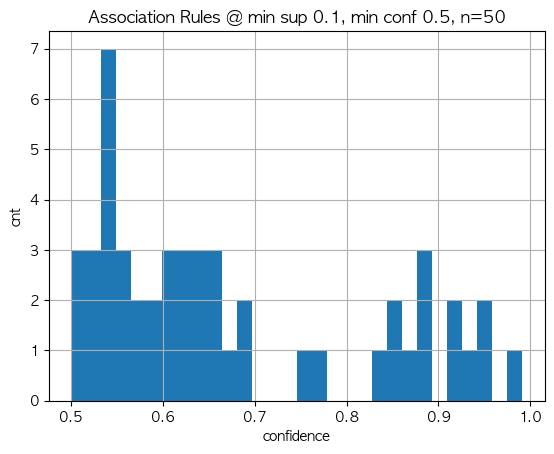

In [15]:
# 신뢰도 관찰
rules_conf.hist('confidence' , bins= 30)

plt.xlabel('confidence')
plt.ylabel('cnt')
txt=f'@ min sup {min_support}, min conf {min_threshold}, n={rules_conf.shape[0]}'
plt.title(f'Association Rules {txt}')
plt.show()

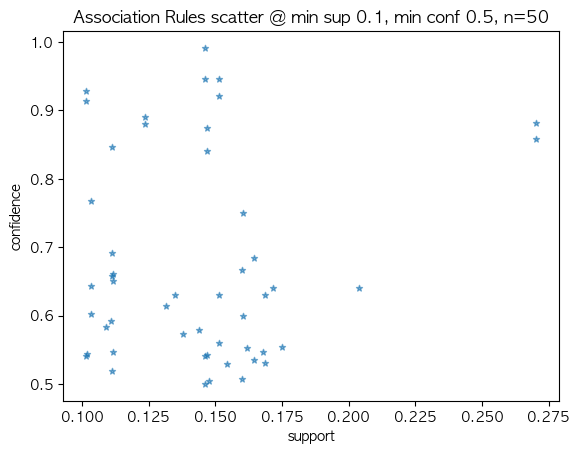

In [16]:
rules_conf.plot.scatter('support','confidence', alpha = 0.6, marker = '*')
plt.xlabel('support')
plt.ylabel('confidence')
plt.title(f'Association Rules scatter {txt}')
plt.show()

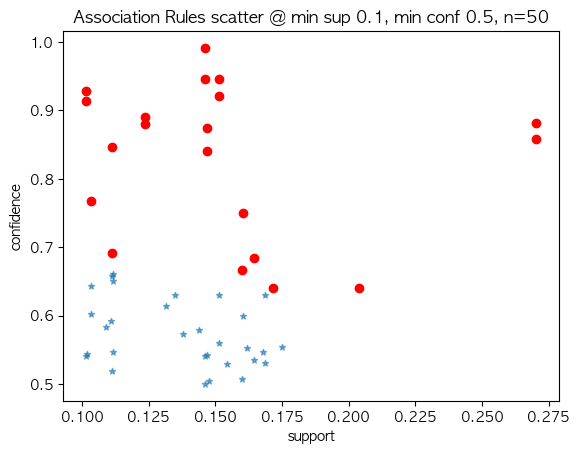

In [17]:
# 새로운 값을 support와 confidence의 합으로 정의
rules_conf['combined_value'] = rules_conf['support'] + rules_conf['confidence']

# combined_value 값을 기준으로 상위 20개의 규칙 추출
top_20_rules = rules_conf.nlargest(20, 'combined_value')

# Scatter plot of association rules
rules_conf.plot.scatter('support', 'confidence', alpha=0.6, marker='*')
plt.xlabel('support')
plt.ylabel('confidence')
plt.title(f'Association Rules scatter {txt}')

# 상위 30개의 규칙 강조 표시
plt.scatter(top_20_rules['support'], top_20_rules['confidence'], color='red')

plt.show()

In [18]:
top_20_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
20,(추락),(가구 및 가구설비),0.306816,0.315301,0.270425,0.881392,2.795401,0.173686,5.772787,0.926550,1.151817
5,"(주택 - 침실/방 , 추락)",(가구 및 가구설비),0.147495,0.315301,0.146193,0.991173,3.143579,0.099688,77.565024,0.799868,1.137365
19,(가구 및 가구설비),(추락),0.315301,0.306816,0.270425,0.857674,2.795401,0.173686,4.870389,0.938032,1.128099
14,"(가구 및 가구설비, (부위)머리 및 뇌(뇌막))",(추락),0.159994,0.306816,0.151401,0.946291,3.084228,0.102312,12.906177,0.804482,1.097691
4,"(주택 - 침실/방 , 가구 및 가구설비)",(추락),0.154482,0.306816,0.146193,0.946341,3.084392,0.098795,12.918265,0.799258,1.092534
15,"(추락, (부위)머리 및 뇌(뇌막))",(가구 및 가구설비),0.164356,0.315301,0.151401,0.921178,2.921585,0.099579,8.686621,0.787081,1.072578
29,"(가구 및 가구설비, 타박상)",(추락),0.109042,0.306816,0.101274,0.928756,3.027079,0.067818,9.729748,0.751605,1.030030
22,"(남자, 추락)",(가구 및 가구설비),0.167936,0.315301,0.146844,0.874402,2.773234,0.093893,5.451531,0.768463,1.021246
30,"(추락, 타박상)",(가구 및 가구설비),0.110778,0.315301,0.101274,0.914202,2.899460,0.066345,7.980343,0.736721,1.015476
25,"(여자, 추락)",(가구 및 가구설비),0.138880,0.315301,0.123581,0.889844,2.822207,0.079792,6.215710,0.749799,1.013425


#### [top10 구하기]
- 종속성이 낮다고 판단되는 행 제거
> - lift, leverage 값 기준으로 판단
> - lift가 1에 근접하고, leverage가 0에 근접한 것이 동시에 만족한 경우 제거함
> - (인덱스 : 32, 8)
> - leverage가 0.7 이하인 경우 제거함
> - (인덱스 : 30, 29, 45, 46)

In [20]:
indices_to_drop = [29, 30, 45, 8, 32, 47]
top_14_rules= top_20_rules.drop(indices_to_drop).reset_index(drop=True)

In [21]:
top_14_rules.sort_values(by='combined_value', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
0,(추락),(가구 및 가구설비),0.306816,0.315301,0.270425,0.881392,2.795401,0.173686,5.772787,0.926550,1.151817
1,"(주택 - 침실/방 , 추락)",(가구 및 가구설비),0.147495,0.315301,0.146193,0.991173,3.143579,0.099688,77.565024,0.799868,1.137365
2,(가구 및 가구설비),(추락),0.315301,0.306816,0.270425,0.857674,2.795401,0.173686,4.870389,0.938032,1.128099
3,"(가구 및 가구설비, (부위)머리 및 뇌(뇌막))",(추락),0.159994,0.306816,0.151401,0.946291,3.084228,0.102312,12.906177,0.804482,1.097691
4,"(주택 - 침실/방 , 가구 및 가구설비)",(추락),0.154482,0.306816,0.146193,0.946341,3.084392,0.098795,12.918265,0.799258,1.092534
5,"(추락, (부위)머리 및 뇌(뇌막))",(가구 및 가구설비),0.164356,0.315301,0.151401,0.921178,2.921585,0.099579,8.686621,0.787081,1.072578
6,"(남자, 추락)",(가구 및 가구설비),0.167936,0.315301,0.146844,0.874402,2.773234,0.093893,5.451531,0.768463,1.021246
7,"(여자, 추락)",(가구 및 가구설비),0.138880,0.315301,0.123581,0.889844,2.822207,0.079792,6.215710,0.749799,1.013425
8,"(여자, 가구 및 가구설비)",(추락),0.140442,0.306816,0.123581,0.879944,2.867988,0.080491,5.773857,0.757743,1.003526
9,"(남자, 가구 및 가구설비)",(추락),0.174793,0.306816,0.146844,0.840099,2.738121,0.093214,4.335091,0.769245,0.986943


#### [ 상위 20개 중 14개 뽑아냄 ]

##### 선행절, 후행절 특징
- 선행정과 후행절에 [품목대분류]가구 및 가구설비, [위해원인]추락이 포함되어 있는 경우 다수 존재.
> - 전체 데이터셋에서 확인했을 때 품목별 분석에서의 결과를 토대로 추측되었던 '작은물품의 섭취 문제' 보다는 추락으로 인한 위해가 더 자주 발생하는 것 확인 가능
- [위해부위]머리 및 뇌(뇌막)이 선행절에 포함되어 있는 경우 빈번히 존재(4번)
> 추락 등의 위해원인으로 인하여 타박상보다 머리에 문제가 자주 발생한다는 사실 확인 가능(0-4세의 경우 몸의 보호 효과가 아주 낮은 것을 고려했을 때 추락이 큰 문제를 야기한다는 사실 추측 가능)

##### 지표별 특징
- support : 평균적으로 16.2% 의 확률로 발생함
- confidence : 평균적으로 85.5% 의 확률, 비교적 높은 조건부확률로 발생함. (A가 발생했을 때 B도 발생)
- lift, leverage : leverage가 lift에 비해 상대적으로 작은 값을 보이지만, lift값을 통해 일정 수준의 종속성을 판단 가능함 (평균적으로 2.8 이상)
- conviction : 최소 2.05, 평균적으로 약 11.17 정도의 값 가짐. 우연의 일치가 일정 수준 배제된 것으로 판단 가능

In [22]:
# 보고서용 정렬
top_14_rules.sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
1,"(주택 - 침실/방 , 추락)",(가구 및 가구설비),0.147495,0.315301,0.146193,0.991173,3.143579,0.099688,77.565024,0.799868,1.137365
4,"(주택 - 침실/방 , 가구 및 가구설비)",(추락),0.154482,0.306816,0.146193,0.946341,3.084392,0.098795,12.918265,0.799258,1.092534
3,"(가구 및 가구설비, (부위)머리 및 뇌(뇌막))",(추락),0.159994,0.306816,0.151401,0.946291,3.084228,0.102312,12.906177,0.804482,1.097691
5,"(추락, (부위)머리 및 뇌(뇌막))",(가구 및 가구설비),0.164356,0.315301,0.151401,0.921178,2.921585,0.099579,8.686621,0.787081,1.072578
7,"(여자, 추락)",(가구 및 가구설비),0.138880,0.315301,0.123581,0.889844,2.822207,0.079792,6.215710,0.749799,1.013425
0,(추락),(가구 및 가구설비),0.306816,0.315301,0.270425,0.881392,2.795401,0.173686,5.772787,0.926550,1.151817
8,"(여자, 가구 및 가구설비)",(추락),0.140442,0.306816,0.123581,0.879944,2.867988,0.080491,5.773857,0.757743,1.003526
6,"(남자, 추락)",(가구 및 가구설비),0.167936,0.315301,0.146844,0.874402,2.773234,0.093893,5.451531,0.768463,1.021246
2,(가구 및 가구설비),(추락),0.315301,0.306816,0.270425,0.857674,2.795401,0.173686,4.870389,0.938032,1.128099
10,"(열상(찢어짐), 건축/인테리어 자재 및 작업공구)",(미끄러짐·넘어짐),0.131263,0.267951,0.111104,0.846421,3.158861,0.075932,4.766590,0.786694,0.957525


## 3. top 14 분포 확인

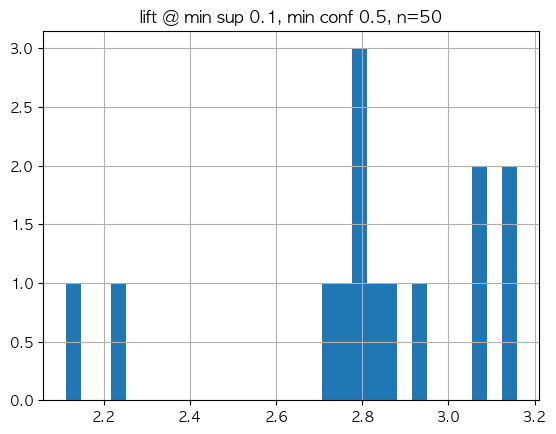

In [23]:
# 향상도 관찰
# 연관규칙의 향상도 분포
top_14_rules.hist('lift', bins = 30)
plt.title(f'lift {txt}')
plt.show()

In [24]:
filter = top_14_rules.lift.ge(3.0)
top_14_rules[filter].sort_values(by='lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
10,"(열상(찢어짐), 건축/인테리어 자재 및 작업공구)",(미끄러짐·넘어짐),0.131263,0.267951,0.111104,0.846421,3.158861,0.075932,4.766590,0.786694,0.957525
1,"(주택 - 침실/방 , 추락)",(가구 및 가구설비),0.147495,0.315301,0.146193,0.991173,3.143579,0.099688,77.565024,0.799868,1.137365
4,"(주택 - 침실/방 , 가구 및 가구설비)",(추락),0.154482,0.306816,0.146193,0.946341,3.084392,0.098795,12.918265,0.799258,1.092534
3,"(가구 및 가구설비, (부위)머리 및 뇌(뇌막))",(추락),0.159994,0.306816,0.151401,0.946291,3.084228,0.102312,12.906177,0.804482,1.097691


##### Lift가 3.0 이상인 항목 분석

- (열상(찢어짐), 건축/인테리어 자재 및 작업공구) → (미끄러짐·넘어짐): lift의 값은 가장 크지만 support, confidence의 값은 다른 4개의 항목보다 작은 편. 앞서 살펴봤던 빈번한 원소들이 선행절, 후행절을 이루고 있음

- (주택 - 침실/방 , 추락) → (가구 및 가구설비) : 앞서 살펴봤던 [위해원인]추락, [품목대분류]가구 및 가구설비인 경우가 support, confidence 값이 가장 높음. 이에 따라 가구 및 가구설비에서 발생하는 추락사고는 침실/방에서 발생할 확률이 높다는 것을 추측할 수 있음

--> [위해부위]머리 및 뇌(뇌막)이 포함된 규칙의 support 값이 가장 높은 것으로 보아, 추락이 발생했을 때 이 부위에 손상이 올 확률이 높다는 것을 확인할 수 있음

--> 더불어 대부분 conf 값이 높은 편에 속함

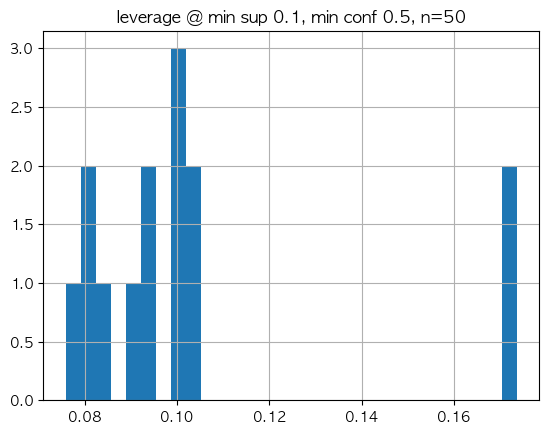

In [25]:
# 레버리지 관찰
# 연관규칙의 레버리지 분포
top_14_rules.hist('leverage', bins = 30)
plt.title(f'leverage {txt}')
plt.show()

In [26]:
filter = top_14_rules.leverage.ge(0.16)
top_14_rules[filter].sort_values(by='leverage', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
0,(추락),(가구 및 가구설비),0.306816,0.315301,0.270425,0.881392,2.795401,0.173686,5.772787,0.926550,1.151817
2,(가구 및 가구설비),(추락),0.315301,0.306816,0.270425,0.857674,2.795401,0.173686,4.870389,0.938032,1.128099


##### Leverage가 높은 항목 분석

- 추락 → 가구 및 가구설비 (혹은 반대) : 이 경우만 leverage가 0.16 이상으로 가장 높게 나옴

--> 이에 대한 절대적인 빈도수와 종속적으로 발생할 확률이 높다는 것 확인 가능. 따라서 대부분의 영유아 추락 사고가 가구 및 가구설비 품목에서 나온다는 것으로 추측됨(이는 영유아가 대부분의 시간을 침대 위에서 지낸다는 사실에 입각하여 신뢰성 있는 결과라고 생각할 수 있음)

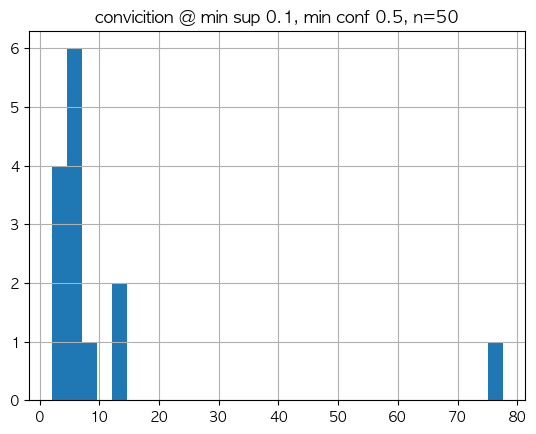

In [27]:
# 확신 관찰
# 연관규칙의 확신 분포
top_14_rules.hist('conviction', bins = 30)
plt.title(f'convicition {txt}')
plt.show()  #inf 값 없음

In [28]:
filter = top_14_rules.conviction.ge(10)
top_14_rules[filter].sort_values(by='conviction', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
1,"(주택 - 침실/방 , 추락)",(가구 및 가구설비),0.147495,0.315301,0.146193,0.991173,3.143579,0.099688,77.565024,0.799868,1.137365
4,"(주택 - 침실/방 , 가구 및 가구설비)",(추락),0.154482,0.306816,0.146193,0.946341,3.084392,0.098795,12.918265,0.799258,1.092534
3,"(가구 및 가구설비, (부위)머리 및 뇌(뇌막))",(추락),0.159994,0.306816,0.151401,0.946291,3.084228,0.102312,12.906177,0.804482,1.097691


##### Conviction이 높은 항목 분석

모두 [위해원인]추락, [품목대분류]가구 및 가구설비가 원소로 존재한다는 것 확인 가능
- 관련된 상관관계(앞서 분석했던 내용들)이 우연의 일치로 발생하지 않았다는 것 다시 한 번 확인 가능

#### [종합 분석 내용]

##### 주요 발견 사항

결과적으로 **[위해원인]추락, [품목대분류]가구 및 가구설비** 이 발생하는 경우가 빈번함.

- [위해부위]머리 및 뇌(뇌막), [위해증상]열상(찢어짐), [품목대분류]건축/인테리어 자재 및 작업공구, [위해장소]주택 - 침실/방도 빈번하게 등장
- 이에 따라 0-4세에서 발생하는 위해 사건의 경위를 **[위해원인]추락으로 인해 발생하는 [위해부위]머리 및 뇌(뇌막), [위해증상]열상(찢어짐)** 정도로 특정할 수 있음
- 이때 품목의 경우 가구 및 가구설비가 우세함 

특이사항 : **영유아의 경우 만 0세, 1세, 2세, 3세, 4세에서 발생하는 사건이 모두 크게 다를 수 있음, 이에 따른 추가 분석이 필요함**

## 4. top 14 시각화

In [29]:
from pyvis.network import Network

# pyvis 네트워크 생성
net = Network(notebook=True, directed=True)

# 색상과 크기 설정 함수
def get_color(confidence):
    if confidence > 0.9:
        return 'red'
    elif confidence > 0.8:
        return 'orange'
    elif confidence > 0.7:
        return 'green'
    elif confidence > 0.6:
        return 'blue'
    else:
        return 'purple'

# 노드와 엣지 추가
for _, row in top_14_rules.iterrows():
    for item in row['antecedents']:
        net.add_node(item, label=item, title=item, color='orange', size=5)
    for item in row['consequents']:
        net.add_node(item, label=item, title=item, color='purple', size=10)
    net.add_edge(
        list(row['antecedents'])[0],
        list(row['consequents'])[0],
        title=f"Confidence: {row['confidence']:.2f}",
        width=0.5
    )

# 네트워크 시각화
net.show("association_rules.html")

association_rules.html


In [30]:
# 상위 20 시각화

from pyvis.network import Network

# pyvis 네트워크 생성
net = Network(notebook=True, directed=True)

# 색상과 크기 설정 함수
def get_color(confidence):
    if confidence > 0.9:
        return 'red'
    elif confidence > 0.8:
        return 'orange'
    elif confidence > 0.7:
        return 'green'
    elif confidence > 0.6:
        return 'blue'
    else:
        return 'purple'

# 노드와 엣지 추가
for _, row in top_20_rules.iterrows():
    for item in row['antecedents']:
        net.add_node(item, label=item, title=item, color='orange', size=5)
    for item in row['consequents']:
        net.add_node(item, label=item, title=item, color='purple', size=10)
    net.add_edge(
        list(row['antecedents'])[0],
        list(row['consequents'])[0],
        title=f"Confidence: {row['confidence']:.2f}",
        width=0.5
    )

# 네트워크 시각화
net.show("association_rules.html")

association_rules.html


In [31]:
# 전체에 대해서

from pyvis.network import Network

# pyvis 네트워크 생성
net = Network(notebook=True, directed=True)

# 색상과 크기 설정 함수
def get_color(confidence):
    if confidence > 0.9:
        return 'red'
    elif confidence > 0.8:
        return 'orange'
    elif confidence > 0.7:
        return 'green'
    elif confidence > 0.6:
        return 'blue'
    else:
        return 'purple'

# 노드와 엣지 추가
for _, row in rules_conf.iterrows():
    for item in row['antecedents']:
        net.add_node(item, label=item, title=item, color=get_color(row['confidence']), size=5)
    for item in row['consequents']:
        net.add_node(item, label=item, title=item, color=get_color(row['confidence']), size=10)
    net.add_edge(
        list(row['antecedents'])[0],
        list(row['consequents'])[0],
        title=f"Confidence: {row['confidence']:.2f}",
        width=0.5
    )

# 네트워크 시각화
net.show("association_rules_전체데이터.html")  # 얘 이름 바꾸면서 저장하깅

association_rules_전체데이터.html
